In [1]:
# Importing required libraries

import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Theory

1. https://www.baeldung.com/cs/epsilon-greedy-q-learning


Code

1. https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

2. This one has the graphs too

https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/

-------------- Improved Epsilon Greedy-------------

3. Ismein DQN hai but they are using epsilon ke decay ke saath

https://python.plainenglish.io/epsilon-greedy-in-deep-q-learning-bdc13e664957

4. Ismein DQN hai but they are using epsilon ke decay ke saath

https://pylessons.com/Epsilon-Greedy-DQN
    

In [2]:
# 4 roads with traffic as 30, 70, 50, 10
A = 30
B = 70
C = 50
D = 10

roads = {'A':-60, 'B':-70, 'C':-50, 'D':-40 }

increment = {'A':-60, 'B':-70, 'C':-50, 'D':-40 }

In [3]:
cost_random = pd.DataFrame(columns = ['Episode', 'Cost'])
#row = {'Episode':x,'Cost':cost}

#cost_random = cost_random.append(row,ignore_index = True)


In [4]:
r_mat = np.zeros([7,7], dtype = int)
q_val = np.zeros([7,7], dtype = int)

'''
r_mat = [[1160,96,96,130,90,110,150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150]]
'''

"""r_mat = [[-1160,-96,-96,-130,-90,-110,-150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150]]
"""
print(r_mat[2][2])


0


In [5]:
episode = 2500
'''

for x in range(episode):
    A = A + 30
    B = B + 70
    C = C + 50
    D = D + 10
   '''

'\n\nfor x in range(episode):\n    A = A + 30\n    B = B + 70\n    C = C + 50\n    D = D + 10\n   '

In [6]:
# RED=0, AC=1, BD=2, Ar=3, Br=4, Cr=5, Dr=6,
actions =  {0:'RED', 1:'AC', 2:'BD', 3:'A', 4:'B', 5:'C', 6:'D'}

In [7]:
states = {0:'RED', 1:'AC', 2:'BD', 3:'A', 4:'B', 5:'C', 6:'D'}

In [8]:
print(states[0])

RED


In [9]:
print(roads)

{'A': -60, 'B': -70, 'C': -50, 'D': -40}


In [10]:
#rewards = []

In [11]:
# Traffic Light

def q_learn(gam, epsilon, alph, decay):
    
    random.seed(7)
    current_state = 0 # RED = 0
    episode = 2500
    alpha = 1
    gamma = 0.8
    #epsilon = 0.9
    rewards = []
    cumulative_r = []
    average_r = []
    penalty_count = 0
    
    '''
    epsilon = 1.0 # max exploration in the beginning
    epsilon_min = 0.01 # min exploration 
    epsilon_decay = 0.0005 # exploration decay 
    '''

    print(current_state)

    #if p < epsilon, explore; else exploit
    for x in range(episode):

        p = np.random.uniform(0, 1)
        print("Probability - ",p)
        next_state = random.choice(list(actions))
        print("Initial Next state is", next_state)

        if p > epsilon:                   # exploiting action space
            next_state = np.argmax(q_val[current_state])
            print("Exploiting: Next state is", next_state)

        else:
            print("Exploring: Next state is", next_state)


        penalty = 1000 #we'll decide on this P, Okay? :)
        if current_state == 0 and next_state == 0:            #illegal move 1: Red ->Red
            penalty = -1000
            penalty_count +=1
        if current_state in range(1,7) and next_state in range(1,7):
            penalty = -1000                        #illegal move 2: Green -> Green
            penalty_count +=1
            
        '''
        if current_state == 1:
            A = A * 0.2
            C = C * 0.2
        if current_state == 2:
            B = B * 0.2
            D = D * 0.2

        if current_state == 3:
            A = 0
        elif current_state == 4:
            B = 0
        elif current_state == 5:
            C = 0
        elif current_state == 6:
            D = 0
        '''
        #print(x,': ',current_state, ' & ', next_state,' -> ', penalty)
        #current_state = next_state

        alpha = 1/(x + 1)

        if x != -1:
            #alpha = 1/(x + 1)
            for n in range (0,7):
                cost1 = 0
                roads1 = roads.copy()
                if n == 1:
                    roads1['A'] = roads1['A'] // 5
                    roads1['C'] = roads1['C'] // 5
                    roads1['B'] += increment['B']
                    roads1['D'] += increment['D']
                if n == 2:
                    roads1['B'] = roads1['B'] // 5
                    roads1['D'] = roads1['D'] // 5
                    roads1['A'] += increment['A']
                    roads1['C'] += increment['C']

                if n in range (3,7):
                    roads1[states[n]] = 0 
                    for n1 in range (3,7):
                        if n1 != n:
                            roads1[states[n1]] += increment [states[n1]]

                

                pen = 1000 #we'll decide on this P, Okay? :)
                if current_state == 0 and n == 0:            #illegal move 1: Red ->Red
                    pen = -1000
                    
                if current_state in range(1,7) and n in range(1,7):
                    pen = -1000                        #illegal move 2: Green -> Green
                    

                cost1 = pen + sum(roads1.values())

                r_mat[next_state][n] = cost1

        print("\nR-Matrix\n")
        for n in r_mat:
            print(n)

        for n in range (0,7):
            maxq = -100000
            if maxq < q_val[next_state][n]:
                maxq = q_val[next_state][n]

        q_val[current_state][next_state] = q_val[current_state][next_state] + alpha * (r_mat[current_state][next_state] + 
                     gamma * (maxq - q_val[current_state][next_state]) )


        print("\nQ-Values\n")
        for n in q_val:
            print(n)



        if next_state == 1:
            roads['A'] = roads['A'] // 5
            roads['C'] = roads['C'] // 5
            roads['B'] += increment['B']
            roads['D'] += increment['D']
        if next_state == 2:
            roads['B'] = roads['B'] // 5
            roads['D'] = roads['D'] // 5
            roads['A'] += increment['A']
            roads['C'] += increment['C']


        if next_state in range (3,7):
            roads[states[next_state]] = 0 
            for i in range (3,7):
                if i != next_state:
                    roads[states[i]] += increment [states[i]]


        print(x,': ',current_state, ' & ', next_state,' -> ', penalty)
        current_state = next_state






        print("\n",roads)
        cost = penalty + sum(roads.values())
        print("\ncost - ",cost)
        rewards.append(cost)
        cumulative_r.append(sum(rewards))
        average_r.append(cumulative_r[-1]/(episode + 1))
        if epsilon > 0.1:
            epsilon = epsilon * decay
    
    return rewards, penalty_count, cumulative_r, average_r


        #print(current_state, ' & ', next_state,' -> ', penalty)
        #current_state = next_state

In [12]:
rewards, penalty_count, cumulative_r, average_r = q_learn(0.8, 1, 1, 1) #gamma eps alpha decay

0
Probability -  0.7273733326008761
Initial Next state is 2
Exploring: Next state is 2

R-Matrix

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[-1220   758   758   680   700   660   640]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
0 :  0  &  2  ->  1000

 {'A': -120, 'B': -14, 'C': -100, 'D': -8}

cost -  758
Probability -  0.060883091220791274
Initial Next state is 1
Exploring: Next state is 1

R-Matrix

[0 0 0 0 0 0 0]
[  758 -1176 -1335 -1282 -1378 -1312 -1414]
[-1220   758   758   680   700   660   640]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[  0 379   0   0   0   0   0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
1 :  2  &  1  ->  -1000

 {'A': -24, 'B': -84, 'C': -20, 'D': -48}

cost -  -1176
Probability -  0.9241138783104262
Initial Next state is 3
Exploring: Next 

In [13]:
print(len(rewards))

2500


In [14]:
print(penalty_count)

1867


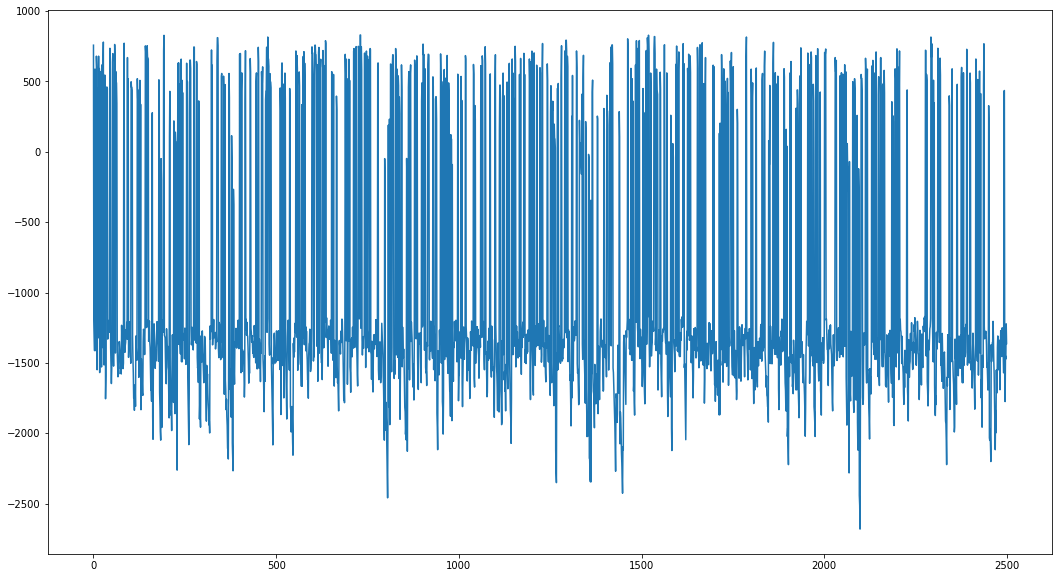

In [15]:
xv = []
for x in range(episode):
    xv.append(x)
plt.figure(figsize=(18, 10))
plt.plot(xv, rewards)

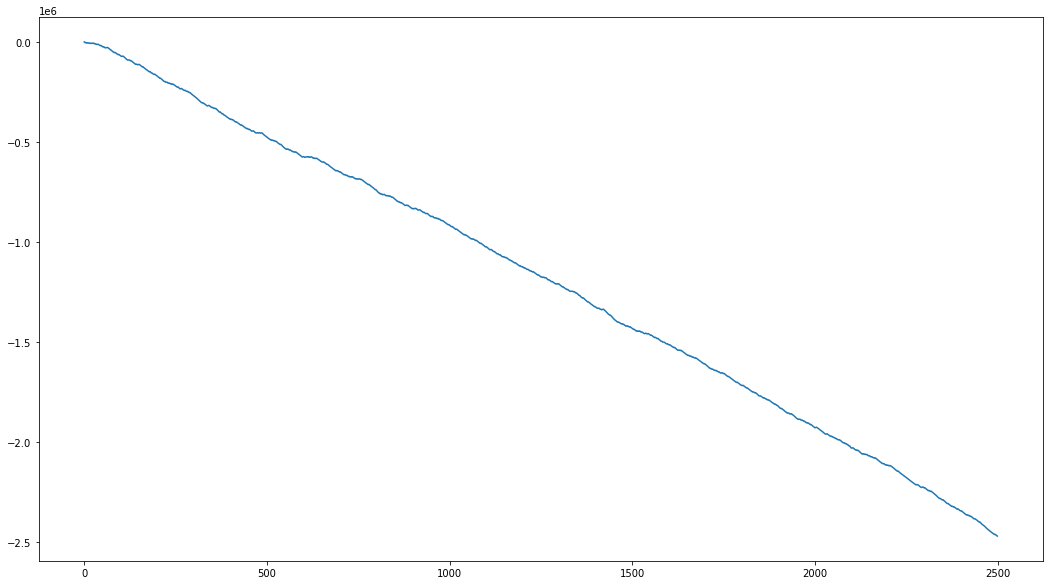

In [16]:
plt.figure(figsize=(18, 10))
plt.plot(xv, cumulative_r)

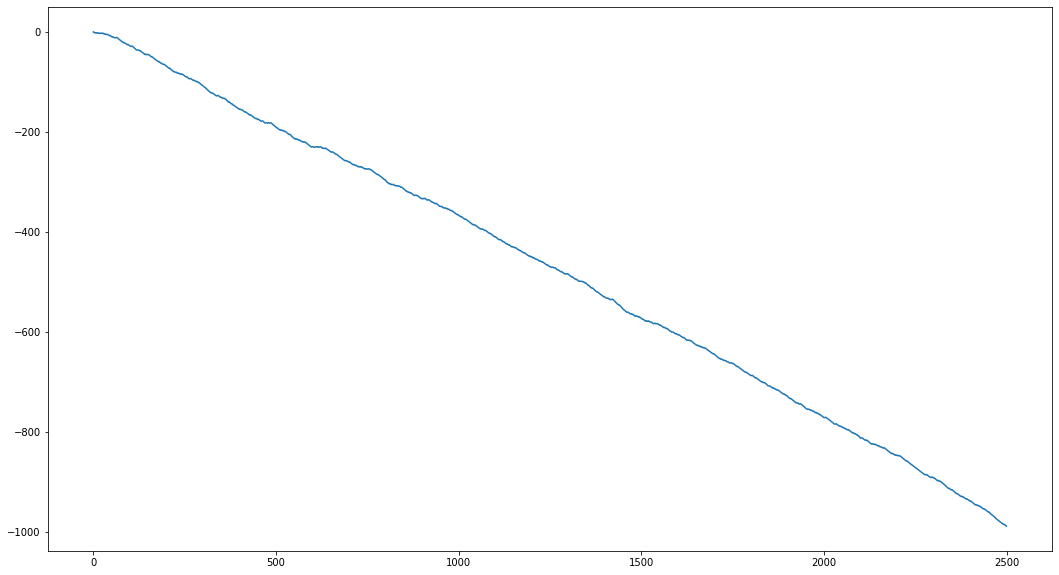

In [17]:
plt.figure(figsize=(18, 10))
plt.plot(xv, average_r)

In [18]:
print(cumulative_r[-1]/1000)

-2471.521


In [19]:
r_mat = np.zeros([7,7], dtype = int)
q_val = np.zeros([7,7], dtype = int)

'''
r_mat = [[1160,96,96,130,90,110,150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150]]
'''

"""r_mat = [[-1160,-96,-96,-130,-90,-110,-150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150]]

"""
print(r_mat[2][2])



0


In [20]:
rewards1, penalty_count1, cumulative_r1, average_r1 = q_learn(0.8, 0, 1, 1) #gamma eps alpha decay

0
Probability -  0.9996215119240902
Initial Next state is 2
Exploiting: Next state is 0

R-Matrix

[-1362   624   721   598   650   468   538]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[-1362     0     0     0     0     0     0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
0 :  0  &  0  ->  -1000

 {'A': -120, 'B': -162, 'C': 0, 'D': -80}

cost -  -1362
Probability -  0.019671863091400454
Initial Next state is 1
Exploiting: Next state is 1

R-Matrix

[-1362   624   721   598   650   468   538]
[-1362   624   721   598   650   468   538]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[-1362   312     0     0     0     0     0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
1 :  0  &  1  ->  1000

 {'A': -24, 'B': -232, 'C': 0, 'D': -120}

cost -  624
Probability -  0.04999665066898

In [21]:
print(len(rewards1))
print(penalty_count1)

2500
794


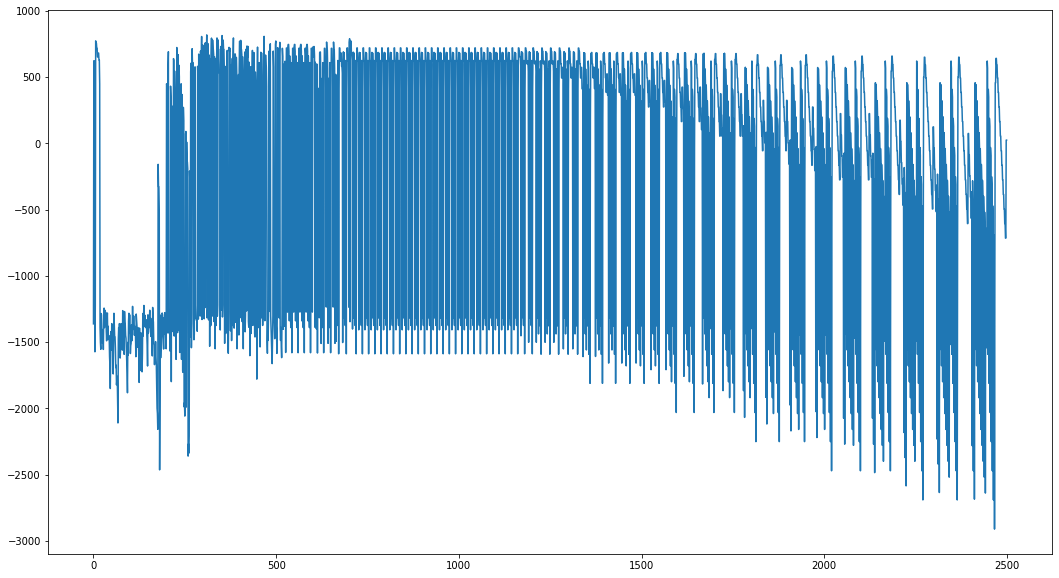

In [22]:
plt.figure(figsize=(18, 10))
plt.plot(xv, rewards1)

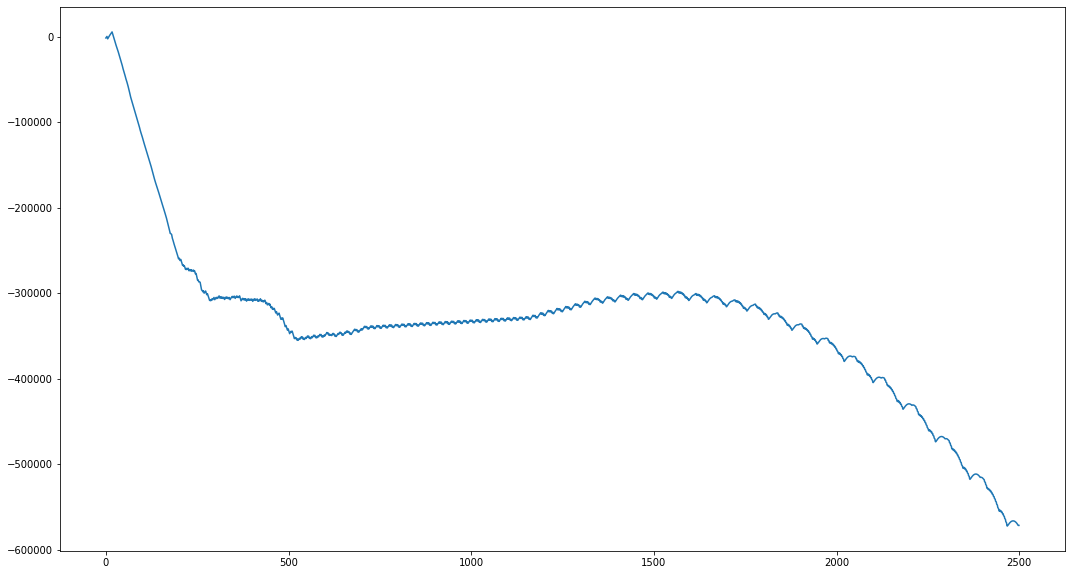

In [23]:
plt.figure(figsize=(18, 10))
plt.plot(xv, cumulative_r1)

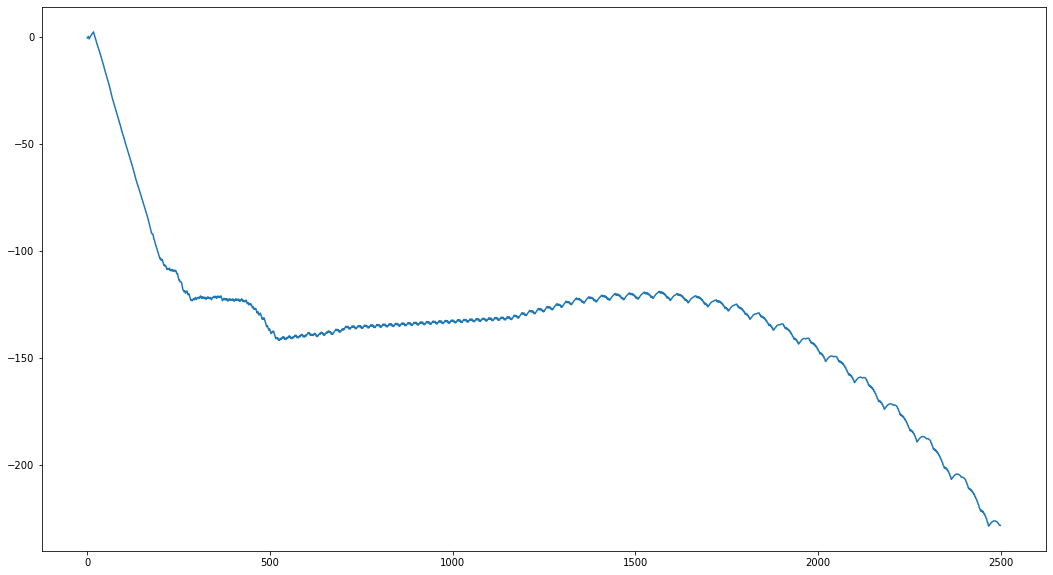

In [24]:
plt.figure(figsize=(18, 10))
plt.plot(xv, average_r1)

In [25]:
r_mat = np.zeros([7,7], dtype = int)
q_val = np.zeros([7,7], dtype = int)

'''
r_mat = [[1160,96,96,130,90,110,150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150],[160,1096,1096,1130,1090,1110,1150],
        [160,1096,1096,1130,1090,1110,1150]]
'''

"""r_mat = [[-1160,-96,-96,-130,-90,-110,-150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150],[-160,-1096,-1096,-1130,-1090,-1110,-1150],
        [-160,-1096,-1096,-1130,-1090,-1110,-1150]]

"""
print(r_mat[2][2])




0


In [26]:
rewards2, penalty_count2, cumulative_r2, average_r2 = q_learn(0.8, 1, 1, 0.99) #gamma eps alpha decay

0
Probability -  0.2326435351304843
Initial Next state is 2
Exploring: Next state is 2

R-Matrix

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[-1975   605     3  -135   -54   718  -114]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
0 :  0  &  2  ->  1000

 {'A': -60, 'B': -15, 'C': -913, 'D': -9}

cost -  3
Probability -  0.9425918816606215
Initial Next state is 1
Exploring: Next state is 1

R-Matrix

[0 0 0 0 0 0 0]
[    3 -1329 -2088 -2097 -2132 -1254 -2168]
[-1975   605     3  -135   -54   718  -114]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]

Q-Values

[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[  0 302   0   0   0   0   0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
1 :  2  &  1  ->  -1000

 {'A': -12, 'B': -85, 'C': -183, 'D': -49}

cost -  -1329
Probability -  0.048765028474965
Initial Next state is 3
Exploring: Next state

In [27]:
print(len(rewards2))
print(penalty_count2)

2500
977


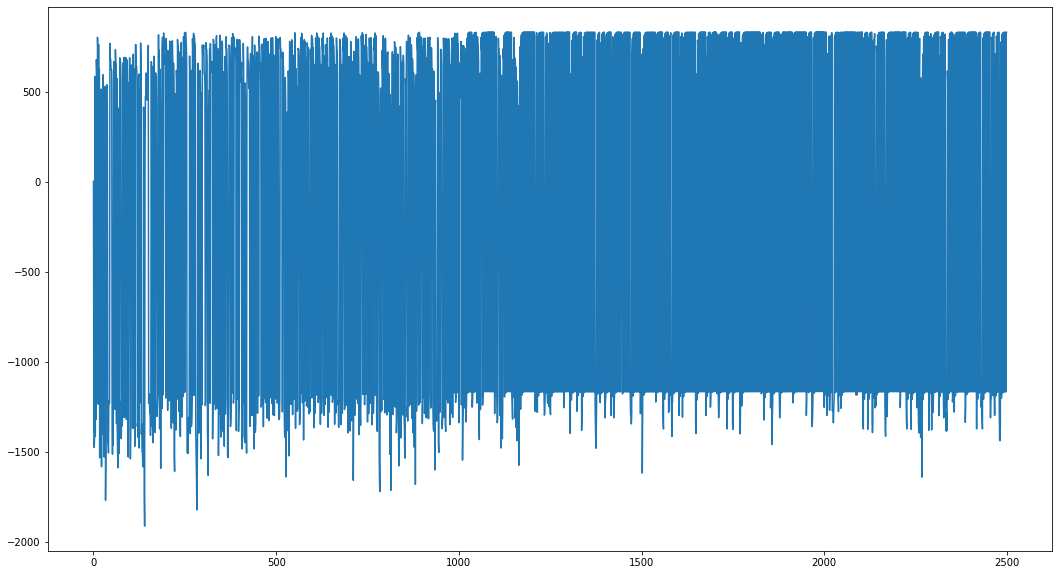

In [28]:
plt.figure(figsize=(18, 10))
plt.plot(xv, rewards2)

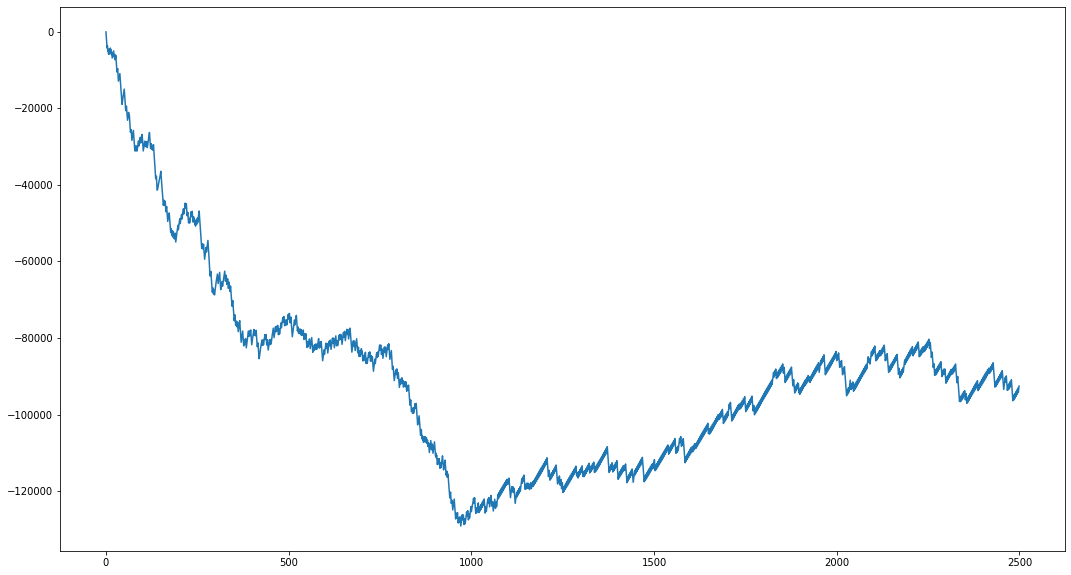

In [29]:
plt.figure(figsize=(18, 10))
plt.plot(xv, cumulative_r2)

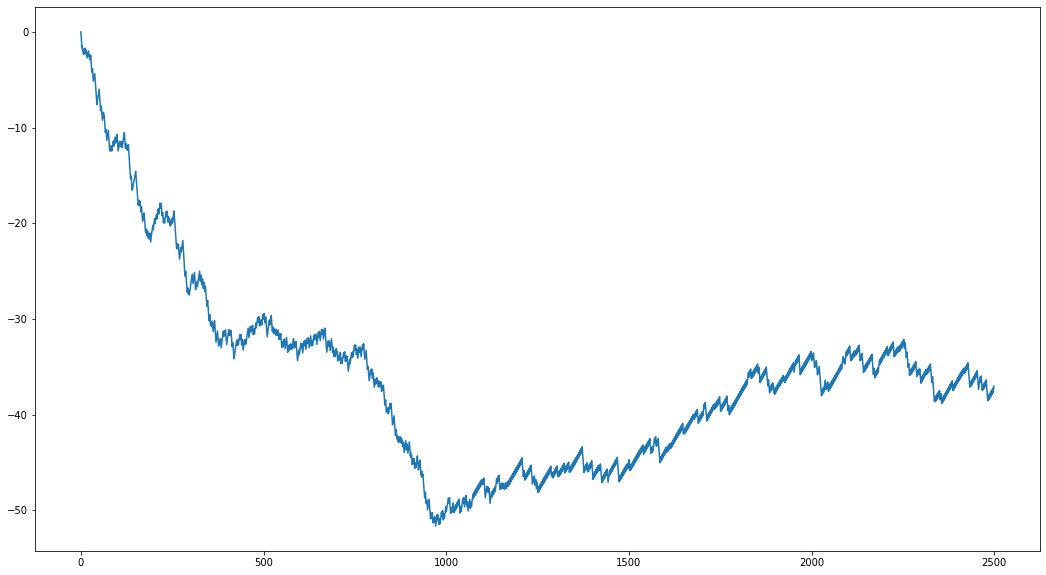

In [30]:
plt.figure(figsize=(18, 10))
plt.plot(xv, average_r2)

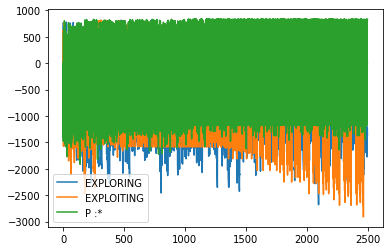

In [31]:
plt.plot(xv, rewards, label = "EXPLORING")
plt.plot(xv, rewards1, label = "EXPLOITING")
plt.plot(xv, rewards2, label = "EPSILON DECAY")
plt.legend()
plt.show()

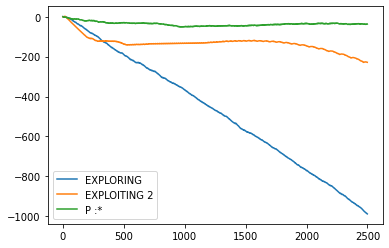

In [32]:
plt.plot(xv, average_r, label = "EXPLORING")
plt.plot(xv, average_r1, label = "EXPLOITING 2")
plt.plot(xv, average_r2, label = "P :*")
plt.legend()
plt.show()

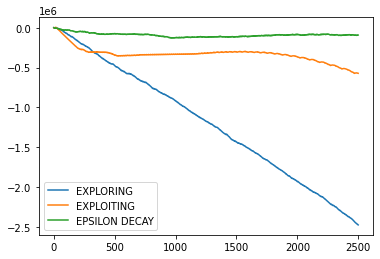

In [33]:
plt.plot(xv, cumulative_r, label = "EXPLORING")
plt.plot(xv, cumulative_r1, label = "EXPLOITING ")
plt.plot(xv, cumulative_r2, label = "EPSILON DECAY")
plt.legend()
plt.show()

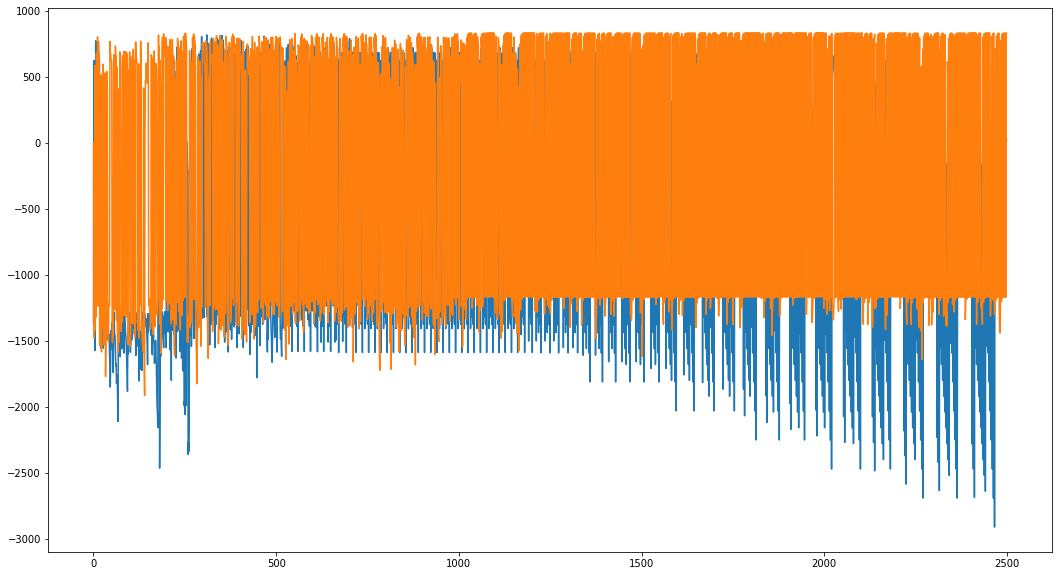

In [34]:
plt.figure(figsize=(18, 10))
plt.plot(xv, rewards1, rewards2)

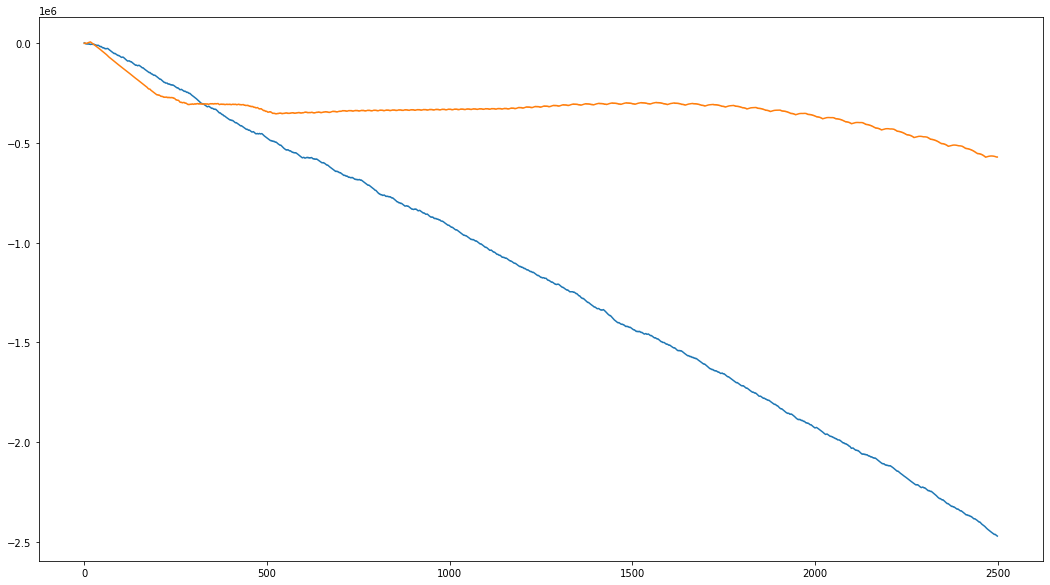

In [35]:
plt.figure(figsize=(18, 10))
plt.plot(xv, cumulative_r,cumulative_r1)

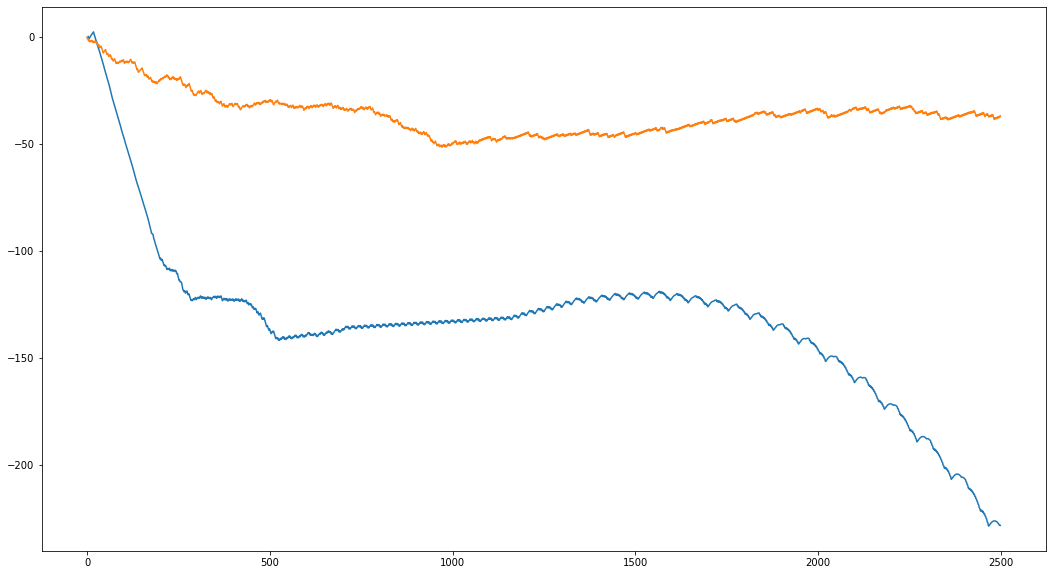

In [36]:
plt.figure(figsize=(18, 10))
plt.plot(xv, average_r1,average_r2)